##Andmete analüüs

Viimases osas toimub eelnevalt kogutud andmete analüüs.

In [56]:
import json
from collections import Counter
from collections import defaultdict
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

In [33]:
puhas_jarjend =[] #loeme sisse andmed
with open('andmed_tabelisse.json') as f:
    for line in f:        
        uus_rida = json.loads(line)  
        puhas_jarjend.append(uus_rida)

In [31]:
puhas_jarjend2 =[] #loeme sisse andmed
with open('loplikult_puhastatud3.json') as f:
    for line in f:        
        uus_rida = json.loads(line)  
        puhas_jarjend2.append(uus_rida)

In [34]:
for rida in puhas_jarjend[:5]: #testime andmeid
    print(rida) 

[1, 2013, '80353', '378813', 1, 0, 1, 0, 0, 0, -1, -1.5, 'Traditsioonilised', 0, 0, -0.0234375, 64, 4, ' 16', 'Thursday', 'Õhtu', 3, 382]
[2, 2012, '12554', '361370', 1, 0, 1, 0, 0, 0, -1, -0.5, 'Traditsioonilised', 0, 0, -0.0023584905660377358, 212, 19, ' 16', 'Tuesday', 'Õhtu', 9, 1490]
[3, 2016, '2341221', '372159', 1, 0, 1, 0, 0, 0, -1, 2.5, 'Traditsioonilised', 1, 0, 0.018796992481203006, 133, 19, ' 22', 'Thursday', 'Õhtu', 8, 816]
[4, 2012, '41359', '372464', 0, 1, 1, 0, 0, 0, -1, -0.5, 'Traditsioonilised', 0, 0, -0.008333333333333333, 60, 14, ' 09', 'Saturday', 'Päev', 4, 389]
[5, 2013, '60866', '364383', 0, 0, 0, 1, 0, 1, 1, 0.5, 'Autonoomsed', 0, 0, 0.005208333333333333, 96, 15, ' 15', 'Tuesday', 'Päev', 5, 631]


In [5]:
for rida in puhas_jarjend2[:3]: #testime andmeid
    print(rida)

[1, '80353', 'Teismeliste käitumine.', '378813', '29.08.2013 16:56', 'Minu esimene mõte oli ka, et kas see teismeline ikka üldse märkas sind? Ma olen ise seda tüüpi, kes avalikes ja rahvarikastes kohtades on nii oma mullis, et kui just otsa ei kõnni, siis võin klaasistunud pilgul ka väga heast ja kallist tuttavast 20 cm kauguselt mööda kõndida ja teda mitte märgata. Ja nii jääbki tere ütlemata ning viisakuse puudumisega pole asjal mingit pistmist. ']
[2, '12554', 'Kuidas karistada kui 2kl. laps ei pane õppimisi kirja?', '361370', '13.03.2012 16:46', 'meile tegi õpetaja selgeks, et järgmise päeva õppimise ülesanded on lapsel kohustus kirjutada päevikusse, tema e-kooli ei kirjuta detailselt järgmise päeva õppimist ja mõned asjad võivad ilmuda tagantjärele. Esmalt peaksin mina lapsega maha tõsise vestluse, kus ta peaks ise analüüsima olukroda, siis las kirjeldab, mida ta tahab/ mis on tema jaoks oluline( sain aru, et hinded ei jäta teda ükskõikseks, sealt ka hoolsus ja tema kui õpilase ma

In [6]:
#saame disainida tabeleid CSS-i kasutades ja luua stiilid
th_props = [ #eksportida selliselt loodud tabeleid on problemaatiline
  ('font-size', '11px'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('color', 'Maroon'),
  ('background-color', 'ivory')
  ]
td_props = [
  ('font-size', '11px'),
  ('background-color', 'ivory'),
  ('text-align', 'center'),
  ('color', '#4d3300')  
  ]
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

In [37]:
df =pd.DataFrame(puhas_jarjend)#loone dataframe tabeli
df.columns = ['Indeks', 'Aasta','Teema_id', 'Isik_id','Trad_konformsus',
              'Trad_heatahtlik_kohustumine','Traditsioonilised',
              'Autonoomia_looming','Autonoomia_saavutamine','Autonoomia',
              'Väärtused_tulemus', 'Emotsiooniskoor','Väärtusjaotus',
              'Pos_emotikonid', 'Neg_emotikonid','Kaalutud_emotsiooniskoor',
             'Sõnade_arv','Emotsioonisõnade_arv',
             'Postituse_aeg','Nädalapäev','Postituse_aeg_agr',
             'Lausete_arv','Tähemärkide_arv']
df['Kasvatusväärtusi'] = df['Traditsioonilised']+df['Autonoomia']
df['Sõnasid_lauses'] = df['Sõnade_arv']/df['Lausete_arv']

In [38]:
df.columns.values.tolist() #saame kätte veergude peakirjad

['Indeks',
 'Aasta',
 'Teema_id',
 'Isik_id',
 'Trad_konformsus',
 'Trad_heatahtlik_kohustumine',
 'Traditsioonilised',
 'Autonoomia_looming',
 'Autonoomia_saavutamine',
 'Autonoomia',
 'Väärtused_tulemus',
 'Emotsiooniskoor',
 'Väärtusjaotus',
 'Pos_emotikonid',
 'Neg_emotikonid',
 'Kaalutud_emotsiooniskoor',
 'Sõnade_arv',
 'Emotsioonisõnade_arv',
 'Postituse_aeg',
 'Nädalapäev',
 'Postituse_aeg_agr',
 'Lausete_arv',
 'Tähemärkide_arv',
 'Kasvatusväärtusi',
 'Sõnasid_lauses']

In [57]:
#keskmiselt sõnasid lauses
df.groupby('Aasta')['Sõnasid_lauses'].mean()#.plot(kind='bar')

Aasta
2012    14.381130
2013    14.650987
2014    14.896520
2015    14.782277
2016    14.953418
2017    14.876188
2018    14.786576
Name: Sõnasid_lauses, dtype: float64

In [58]:
#keskmiselt tähemärke tekstis 
df.groupby('Aasta')['Tähemärkide_arv'].mean()#.plot(kind='bar') 

Aasta
2012     868.952727
2013     906.712312
2014     925.671551
2015    1039.687578
2016    1050.995943
2017     988.292191
2018    1022.773196
Name: Tähemärkide_arv, dtype: float64

In [49]:
#keskmiselt lauseid tekstis
df.groupby('Aasta')['Lausete_arv'].mean()#.plot(kind='bar') 

Aasta
2012     9.410909
2013     9.864322
2014     9.757021
2015    10.856964
2016    11.131846
2017    10.458438
2018    10.612371
Name: Lausete_arv, dtype: float64

In [10]:
#loeme kokku positiivsed ja negatiivsed tujukujud
pos_emotikon_loe = Counter()
neg_emotikon_loe = Counter()
kokku_pos =0
kokku_neg =0
for index,row in df.iterrows():
    if int(row['Pos_emotikonid']) >0:
        pos_emotikon_loe[row['Pos_emotikonid']]+=1
        kokku_pos +=int(row['Pos_emotikonid'])
    if int(row['Neg_emotikonid']) >0:
        neg_emotikon_loe[row['Neg_emotikonid']]+=1
        kokku_neg +=int(row['Neg_emotikonid'])

In [11]:
#liidame andmed üheks tabeliks
pos_emo=pd.Series(pos_emotikon_loe).to_frame('Positiivsed emotikonid')
neg_emo= pd.Series(neg_emotikon_loe).to_frame('Negatiivsed emotikonid')
result = pd.concat([pos_emo, neg_emo], axis=1, join='outer')
result.fillna(0,inplace=True)
result= result.astype(int)
result = result.rename_axis('Emotikonide arv tekstis')
result_T2 = result.T
result_T2['Kokku'] = 0 #lisame uue veeru
result_T2.iloc[0,5] =kokku_pos #lisame veergu andmed 
result_T2.iloc[1,5] =kokku_neg
result_T2
result_T2.style.set_table_styles(styles)

Emotikonide arv tekstis,1,2,3,4,5,Kokku
Positiivsed emotikonid,439,88,31,11,2,762
Negatiivsed emotikonid,37,3,0,2,0,51


In [12]:
#jagame tekstid sõnade arvust lähtuvalt kolme võrdsesse osasse
df['tekstide_jaotus'] = df['Sõnade_arv'].astype(int)
teksti_pikkus=pd.qcut(df['tekstide_jaotus'],3,labels = ['Lühike','Keskmine','Pikk'],duplicates='drop')

Saamaks ülevaadet, mis kelleaegadel kõige rohkem tekste on aastate jooksul loodud, jaotati ööpäev kolmeks – jaotus „öö“ hõlmab ajavahemikku 00.00-07.59, „päev“ hõlmab ajavahemikku 08.00-15.59 ja „õhtu“ hõlmab ajavahemikku 16.00-23.59. 

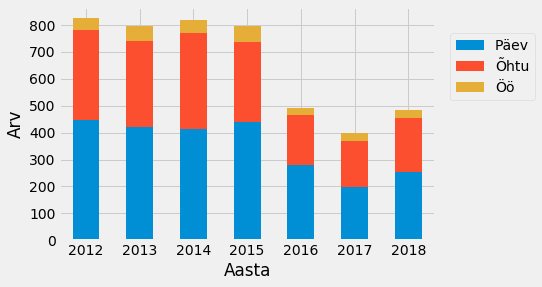

In [59]:
with plt.style.context('fivethirtyeight'): #tekstide jagunemine aastate ja päeva osa järgi 
    df.groupby(['Aasta', 'Postituse_aeg_agr']).size().unstack().plot(kind='bar', stacked=True)
    plt.xticks(rotation='horizontal')
    plt.legend(loc=(1.04,0.6))
    plt.ylabel('Arv')

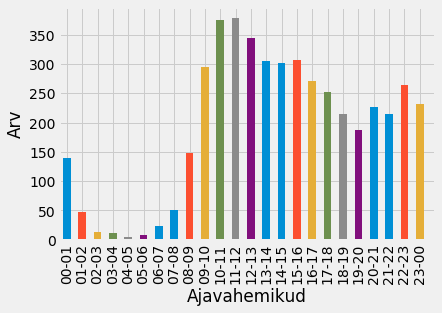

In [61]:
with plt.style.context('fivethirtyeight'): #tekstide jagunemine kirjutamise aja järgi
    df['Postituse_aeg'].groupby(df['Postituse_aeg']).value_counts().plot(kind='bar')
    x =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    labels = ['00-01','01-02','02-03','03-04','04-05','05-06','06-07','07-08',
             '08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16',
              '16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'
              ]
    plt.xticks(x, labels)
    plt.xlabel('Ajavahemikud')
    plt.ylabel('Arv')

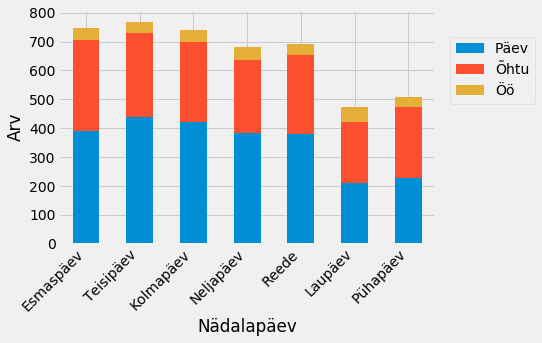

In [15]:
uus_df =df #tekstide jagunemine nädalapäevade järgi
uus_df['Nädalapäev'] = pd.Categorical(uus_df['Nädalapäev'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
with plt.style.context('fivethirtyeight'):
    uus_df.groupby(['Nädalapäev', 'Postituse_aeg_agr']).size().unstack().plot(kind='bar', stacked=True)
    x =[0,1,2,3,4,5,6]
    labels = ['Esmaspäev','Teisipäev','Kolmapäev','Neljapäev','Reede',
              'Laupäev','Pühapäev']
    plt.xticks(x, labels,rotation=45,ha='right')
    plt.legend(loc=(1.04,0.6))
    plt.ylabel('Arv')

Sotsiaalmeedias avaldatud tekstide pikkused erinevad, sõltudes ka keskkonna poolt pandud piirangutest. Näiteks kuigi aastal 2019 on Twitteri säutsu maksimumpikkuseks 280 tähemärki, oli Sarah Perez’i andmetel  aastal 2018 ainult 5% säutsudest pikemad kui 190 tähemärki. Perekooli foorumist allalaaditud kasvatusväärtusi sisaldavate tekstide keskmine pikkus oli 145 sõna (sh. tujukujud) ja mediaan 115 sõna, keskmiselt oli ühes tekstis 960 tähemärki, 10,2 lauset ja ühes lauses oli keskmiselt 14,7 sõna, kusjuures sõnade arv lauses varieerus aastate jooksul vähe. Kasvatusväärtusi sisaldavate tekstide pikkus on oluline eeskätt seetõttu, et Pajupuu jt järgi on vaja teksti emotsionaalsuse paremaks määramiseks teksti, mille miinimumpikkus oleks kaks omavahel sisuliselt seotud lauset (Pajupuu jt, 2016). 

Teksti emotsionaalsus määrati 4576 tekstis (99,2%), emotsiooniskoor jäi nulli 257 tekstis, positiivse emotsiooniskooriga tekste oli 2413 ja negatiivse emotsiooniskooriga tekste 1906. Emotsionaalsus jäi määramata 36 tekstis, sest seal polnud ühtegi emotsionaalsusega tekstiühikut.

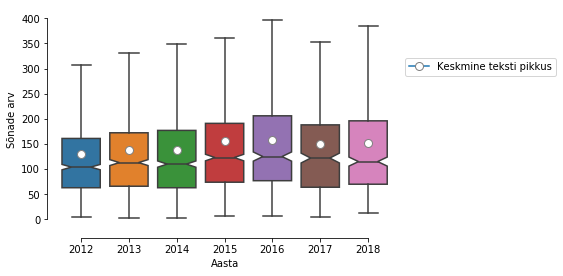

In [60]:
#boxplot tüüpi joonis, näitab tekstide jaotust
ax=sns.boxplot(x="Aasta", y='Sõnade_arv',
               data=df,showfliers=False, showmeans=True,notch=True,
              meanprops={"marker":"o","markerfacecolor":"white",
                         "markeredgecolor":"grey", 'markersize':8})
sns.despine(offset=10, trim=True)
plt.ylabel('Sõnade arv')
ring = mlines.Line2D([], [],markeredgecolor="grey", markerfacecolor='white', marker='o',
                          markersize=8, label='Keskmine teksti pikkus')
plt.legend(handles=[ring],loc=(1.04,0.7))

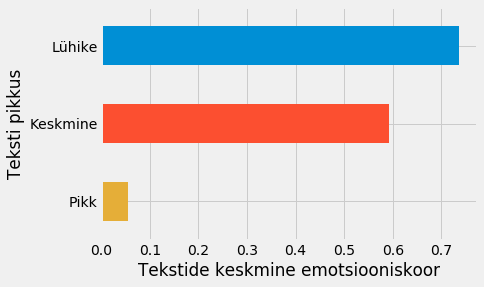

In [28]:
with plt.style.context('fivethirtyeight'):#leiame keskmise emotsiooniskoori teksti pikkuste järgi
    df.groupby(teksti_pikkus) ['Emotsiooniskoor'].mean().plot(kind='barh', stacked=True)
    plt.ylabel('Teksti pikkus')
    plt.xlabel('Tekstide keskmine emotsiooniskoor')
    plt.gca().invert_yaxis()#muudame y-teljel järjekorra vastupidiseks

In [837]:
#loeme kokku autonoomsed ja traditsioonilised kasvatusväärtused
autonoomia_kokku = 0
traditsioonid_kokku = 0
autonoomia_loe = Counter()
traditsioonid_loe = Counter()
kasvatusvaartused_loe = Counter()
for index, row in df.iterrows():
    kasvatusvaartus =row['Autonoomia']+row['Traditsioonilised']
    kasvatusvaartused_loe[kasvatusvaartus] +=1
    if row['Autonoomia'] >0:
        autonoomia_loe[row['Autonoomia']]+=1
        autonoomia_kokku += row['Autonoomia']
    if row['Traditsioonilised'] >0:
        traditsioonid_loe[row['Traditsioonilised']]+=1
        traditsioonid_kokku += row['Traditsioonilised']

In [847]:
#liidame andmed ja teeme tabeli
uus1=pd.Series(autonoomia_loe).to_frame('Autonoomia')
uus2= pd.Series(traditsioonid_loe).to_frame('Traditsioonilised')
#uus3= pd.Series(kasvatusvaartused_loe).to_frame('Loomingulised + traditsioonilised')
result = pd.concat([uus1, uus2], axis=1, join='outer')
result.fillna(0,inplace=True)
#result = result.append(result.agg(['sum']))#lisan rea, kus on veergude summad
result= result.astype(int)
result = result.rename_axis('Kasvatusväärtuste arv')
result_T = result.T
result_T['Kokku'] = 0 #lisame uue veeru
result_T.iloc[0,8] =autonoomia_kokku #lisame veergu andmed 
result_T.iloc[1,8] =traditsioonid_kokku
result_T = result_T.append(result_T.agg(['sum']))#lisan rea, kus on veergude summad
result_T.index = result_T.index[:-1].append(pd.Index(['Kokku']))
result_T 
result_T.style.set_table_styles(styles)#lisame tabelile stiili

Kasvatusväärtuste arv,1,2,3,4,5,6,7,10,Kokku
Autonoomia,2101,256,46,11,3,2,1,1,2839
Traditsioonilised,2015,256,44,16,5,3,0,0,2766
Kokku,4116,512,90,27,8,5,1,1,5605


In [839]:
auton_looming = 0 #loeme kokku nelja väärtusgrupi andmed
auton_saavutamine = 0
trad_konformsus = 0
trad_hea = 0
auton1_loe = Counter()
auton2_loe = Counter()
traditsioonid1_loe = Counter()
traditsioonid2_loe = Counter()
for index, row in df.iterrows():
    if row['Autonoomia_looming'] >0:
        auton1_loe[row['Autonoomia_looming']]+=1
        auton_looming += row['Autonoomia_looming']
    if row['Autonoomia_saavutamine'] >0:
        auton2_loe[row['Autonoomia_saavutamine']]+=1
        auton_saavutamine += row['Autonoomia_saavutamine']
    if row['Trad_konformsus'] >0:
        traditsioonid1_loe[row['Trad_konformsus']]+=1
        trad_konformsus +=row['Trad_konformsus']
    if row['Trad_heatahtlik_kohustumine'] >0:
        traditsioonid2_loe[row['Trad_heatahtlik_kohustumine']]+=1
        trad_hea +=row['Trad_heatahtlik_kohustumine']

In [840]:
#liidame andmed tabeliks
auton1=pd.Series(auton1_loe).to_frame('Loomingulisus')
auton2=pd.Series(auton2_loe).to_frame('Saavutamine')
trad1= pd.Series(traditsioonid1_loe).to_frame('Konformsus')
trad2= pd.Series(traditsioonid2_loe).to_frame('Heatahtlikkus/Kohustumine')
result = pd.concat([auton1,auton2,trad1,trad2], axis=1, join='outer')
result.fillna(0,inplace=True)
result= result.astype(int)
result = result.rename_axis('Kasvatusväärtuste arv')
result_T = result.T
result_T['Kokku'] = 0 #lisame uue veeru
result_T.iloc[0,8] =auton_looming #lisame veergu andmed 
result_T.iloc[1,8] =auton_saavutamine
result_T.iloc[2,8] =trad_konformsus 
result_T.iloc[3,8] =trad_hea
result_T = result_T.append(result_T.agg(['sum']))#lisan rea, kus on veergude summad
result_T.index = result_T.index[:-1].append(pd.Index(['Kokku']))
result_T 
result_T.style.set_table_styles(styles)


Kasvatusväärtuste arv,1,2,3,4,5,6,7,10,Kokku
Loomingulisus,1753,209,41,8,3,2,1,1,2370
Saavutamine,427,18,2,0,0,0,0,0,469
Konformsus,1232,139,24,8,1,2,0,0,1631
Heatahtlikkus/Kohustumine,890,93,14,3,1,0,0,0,1135
Kokku,4302,459,81,19,5,4,1,1,5605


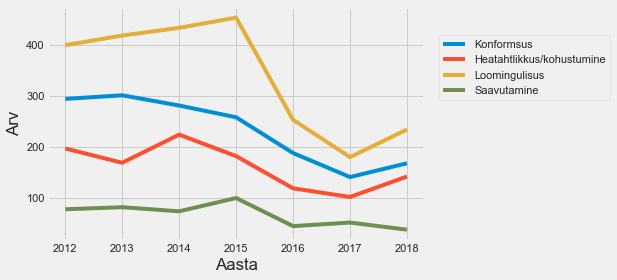

In [841]:
with plt.style.context('fivethirtyeight'):#kasvastusväärtuste arv 
    df.groupby('Aasta')['Trad_konformsus','Trad_heatahtlik_kohustumine',
                        'Autonoomia_looming','Autonoomia_saavutamine'].sum().plot(kind='line') 
    my_labels =['Konformsus','Heatahtlikkus/kohustumine',
           'Loomingulisus','Saavutamine']
    plt.xlabel('Aasta')
    plt.ylabel('Arv')
    plt.legend(loc=(1.04,0.6),labels=my_labels)  

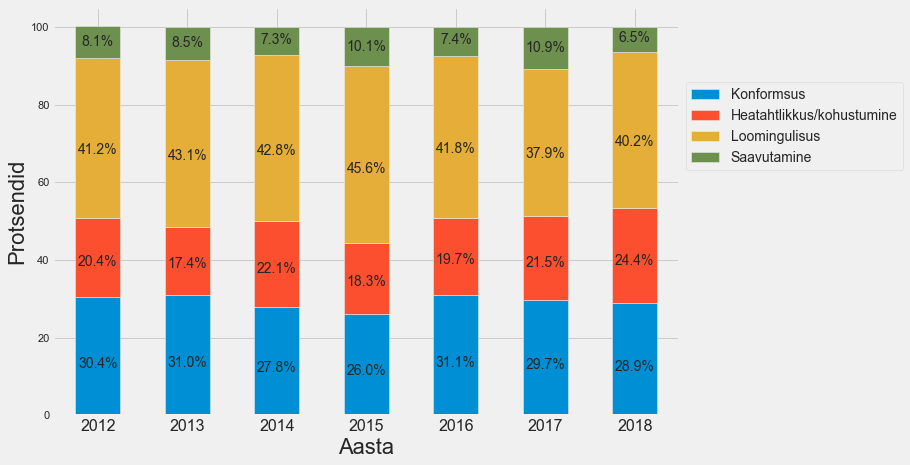

In [842]:
#kasvatusväärtuste protsentuaalne jaotumine
kokku =df.groupby('Aasta')['Trad_konformsus','Trad_heatahtlik_kohustumine',
                        'Autonoomia_looming','Autonoomia_saavutamine'].sum()
maatriks =[]
for index,row in kokku.iterrows():
    jarjend =[]
    summa =row[0]+row[1]+row[2]+row[3]    
    tulemus1 = round((row[0]/summa)*100,1)
    tulemus2 = round((row[1]/summa)*100,1)
    tulemus3 = round((row[2]/summa)*100,1)
    tulemus4 = round((row[3]/summa)*100,1)
    jarjend +=[tulemus1,tulemus2,tulemus3,tulemus4]
    maatriks +=[jarjend]
with plt.style.context('fivethirtyeight'):
    index= ['2012', '2013','2014','2015','2016','2017','2018']    
    labels =['Konformsus','Heatahtlikkus/kohustumine',
           'Loomingulisus','Saavutamine']
    tabel = pd.DataFrame.from_records(maatriks, columns=labels, index = index)
    ax = tabel.plot.bar(figsize=(10,7), stacked=True)
    for el in ax.patches:
        _x = el.get_x() + el.get_width() / 2
        _y = el.get_y() + el.get_height()*0.4
        vaartus = ('{:.1f}'.format(el.get_height()))+ str('%')
        ax.text(_x, _y, vaartus, ha="center") 
    plt.xlabel('Aasta',fontsize= 22)
    plt.ylabel('Protsendid',fontsize= 22)
    plt.xticks(rotation=0, fontsize =16)
    plt.legend(loc=(1.01,0.6),fontsize =14)

Kasvatusväärtuste väärtusgruppide ja väärtusjaotuse keskmine emotsiooniskoor
Kasvatusväärtusi analüüsiti kasvatusväärtuste keskmist emotsioonskoori aluseks võttes kahel viisil:
* Väärtusgruppide järgi - autonoomsete kasvatusväärtuste alamjaotused „Saavutamine“ ja „Loomingulisus“ ning traditsiooniliste kasvatusväärtuste alamjaotused „Konformsus“ ja „Heatahtlikkus/kohustumine“.
* Väärtusjaotuse järgi - autonoomse kasvatusväärtuse leidmisel liideti kasvatusväärtuste summale number üks ja traditsiooniliste väärtuste leidmisel lahutati number üks. Kokku loodi nii viis kategooriat, kus „Võrdne“ tähendas sama arvu traditsiooniliste ja autonoomsete kasvatusväärtuste leidumist ühes tekstis, „Traditsiooniline“ tähendas tekstis ühe enama traditsioonilise kasvatusväärtuse leidumist võrreldes autonoomsete kasvatusväärtustega, „Traditsiooniline 2+“ tähendas tekstis kahe või enama traditsioonilise kasvatusväärtuse leidumist võrreldes autonoomsete kasvatusväärtustega, „Autonoomne“ tähendas tekstis ühe enama autonoomse kasvatusväärtuse leidumist võrreldes traditsiooniliste kasvatusväärtustega ja „Autonoomne 2+“ tähendas tekstis kahe või enama autonoomse kasvatusväärtuse leidumist võrreldes traditsiooniliste  kasvatusväärtustega.
Kasvatusväärtuste väärtusgruppide keskmine emotsiooniskoor arvutati erinevalt tekstide keskmisest emotsiooniskoorist, kus jagati keskmise saamiseks tekstide emotsiooniskooride summa tekstide arvuga. Autonoomsete kasvatusväärtuste alamjaotuste „Saavutamine“ ja „Loomingulisus“ ning traditsiooniliste kasvatusväärtuste alamjaotuse „Konformsus“ ja „Heatahtlikkus/kohustumine“ keskmise emotsiooniskoori arvutamiseks anti kõigile tekstis leiduvatele erinevatele kasvatusväärtuste alamjaotustele sama emotsiooniskoori väärtus, näiteks kui teksti emotsiooniskoor oli -10, siis said sama väärtuse (-10) nii tekstis leiduvad „saavutamise“ kui ka „loomingulisuse“ kasvatusväärtuste grupp ning kui mingi grupi kasvatusväärtusi oli tekstis rohkem kui üks, siis tulemus sellest ei muutunud. Kasvatusväärtuste keskmine emotsiooniskoor saadi kasvatusväärtuste alamjaotuse kasvatusväärtuste emotsiooniskooride summa jagamisel seda liiki kasvatusväärtusi sisaldavate tekstide arvuga.

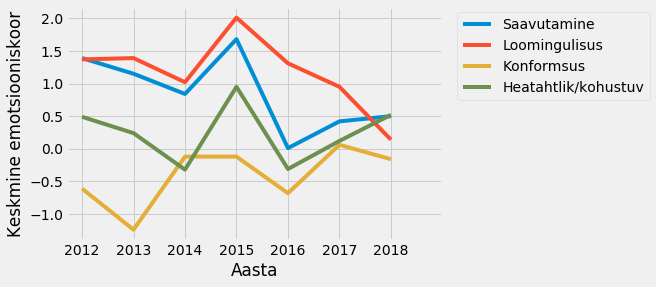

In [50]:
auton_saav_loe =Counter()#loeme andmed kasvatusväärtuste kaupa kokku
auton_loom_loe=Counter()
trad_konf_loe =Counter()
trad_kohu_loe=Counter()
auton_saav_superturbo=Counter()
auton_loom_superturbo=Counter()
trad_konf_superturbo =Counter()
trad_kohu_superturbo=Counter()
keskmine_tulemus_saav=Counter()
keskmine_tulemus_loom=Counter()
keskmine_tulemus_konf=Counter()
keskmine_tulemus_kohu=Counter()
saav_jarjend =[]
loom_jarjend =[]
konf_jarjend =[]
kohu_jarjend =[]
kasvatusvaartused_jarjend =[]
for index,row in df.iterrows():        
    if row['Autonoomia_saavutamine'] !=0:
        auton_saav_superturbo[row['Aasta']]+=1
        auton_saav_loe[row['Aasta']]+=row['Emotsiooniskoor']
    if row['Autonoomia_looming'] !=0:
        auton_loom_superturbo[row['Aasta']]+=1
        auton_loom_loe[row['Aasta']]+=row['Emotsiooniskoor']
    if row['Trad_konformsus'] !=0:
        trad_konf_superturbo[row['Aasta']]+=1
        trad_konf_loe[row['Aasta']]+=row['Emotsiooniskoor']
    if row['Trad_heatahtlik_kohustumine'] !=0:
        trad_kohu_superturbo[row['Aasta']]+=1
        trad_kohu_loe[row['Aasta']]+=row['Emotsiooniskoor']
for k,v in auton_saav_loe.items():#arvutame keskmised
    for k2,v2 in auton_saav_superturbo.items():
        if k ==k2:
            tulemus =round(v/v2,2)#v2
            keskmine_tulemus_saav[k]=tulemus
for k,v in auton_loom_loe.items():
    for k2,v2 in auton_loom_superturbo.items():
        if k ==k2:
            tulemus =round(v/v2,2)
            keskmine_tulemus_loom[k]=tulemus
for k,v in trad_konf_loe.items():
    for k2,v2 in trad_konf_superturbo.items():
        if k ==k2:
            tulemus =round(v/v2,2)
            keskmine_tulemus_konf[k]=tulemus
for k,v in trad_kohu_loe.items():
    for k2,v2 in trad_kohu_superturbo.items():
        if k ==k2:
            tulemus =round(v/v2,2)
            keskmine_tulemus_kohu[k]=tulemus
#järjestame andmed soovitud järjekorras
result_saav = sorted(keskmine_tulemus_saav.items() , key=lambda t : t[0])
result_loom = sorted(keskmine_tulemus_loom.items() , key=lambda t : t[0])
result_konf = sorted(keskmine_tulemus_konf.items() , key=lambda t : t[0])
result_kohu = sorted(keskmine_tulemus_kohu.items() , key=lambda t : t[0])

for k,v in result_saav:#paneme andmed järjenditesse
    saav_jarjend +=[v]
for k,v in result_loom:
    loom_jarjend +=[v] 
for k,v in result_konf:
    konf_jarjend +=[v]
for k,v in result_kohu:
    kohu_jarjend +=[v]
kasvatusvaartused_jarjend =[saav_jarjend,loom_jarjend,konf_jarjend,kohu_jarjend]
labels= ['2012', '2013','2014','2015','2016','2017','2018']     
index =['Saavutamine','Loomingulisus', 
        'Konformsus','Heatahtlik/kohustuv']
#loome tabeli
tabel = pd.DataFrame.from_records(kasvatusvaartused_jarjend, columns=labels, index = index)
tabel.fillna(0,inplace=True)
tabel = tabel.rename_axis('Kasvatusväärtuste keskmine emotsiooniskoor')
tabel
tabel_T = tabel.T #pöörame tabelit
tabel_T
with plt.style.context('fivethirtyeight'):#teeme joonise
    tabel_T.plot()
    x =[0,1,2,3,4,5,6,7]
    plt.xticks(x, labels)
    plt.legend(loc=(1.04,0.6))
    plt.xlabel('Aasta')
    plt.ylabel('Keskmine emotsiooniskoor')
    #plt.title ('Kasvatusväärtuste keskmine emotsiooniskoor')


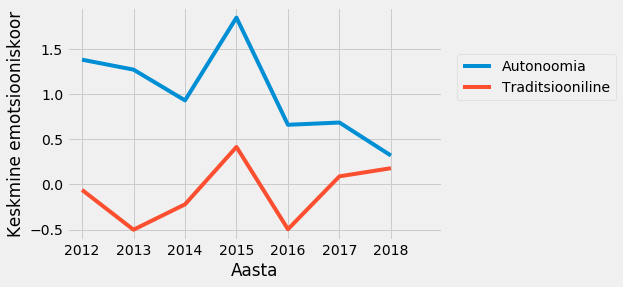

In [51]:
uus_tabel = tabel_T #kasvatusväärtuste keskmine emotsiooniskoor
uus_tabel['Autonoomia'] = (uus_tabel['Saavutamine']+uus_tabel['Loomingulisus'])/2
uus_tabel['Traditsiooniline'] = (uus_tabel['Konformsus']+uus_tabel['Heatahtlik/kohustuv'])/2
uus_tabel = uus_tabel.drop(["Saavutamine", "Loomingulisus",
                            "Konformsus","Heatahtlik/kohustuv"], axis=1)
uus_tabel
with plt.style.context('fivethirtyeight'):
    uus_tabel.plot()
    x =[0,1,2,3,4,5,6,7]
    plt.xticks(x, labels)
    plt.legend(loc=(1.04,0.6))
    plt.xlabel('Aasta')
    plt.ylabel('Keskmine emotsiooniskoor')

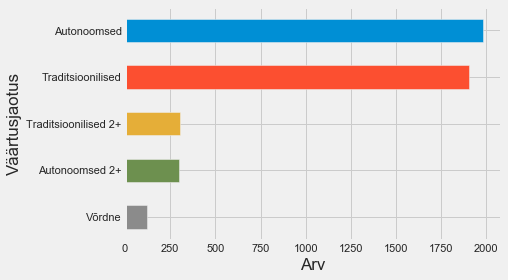

In [768]:
with plt.style.context('fivethirtyeight'):#väärtusjaotus arvuliselt
    df['Väärtusjaotus'].value_counts().plot(kind='barh')
    plt.ylabel('Väärtusjaotus')
    plt.xlabel('Arv')
    plt.gca().invert_yaxis()

Kasvatusväärtuste keskmise emotsiooniskoori arvutamiseks jagati väärtusjaotuses olevate tekstide emotsiooniskooride summa väärtusjaotuses olevate tekstide arvuga, näiteks kui väärtusjaotuses „Võrdne“ on 10 teksti, mille emotsiooniskooride summa on 20, siis on väärtusjaotuse keskmine emotsiooniskoor 2. 

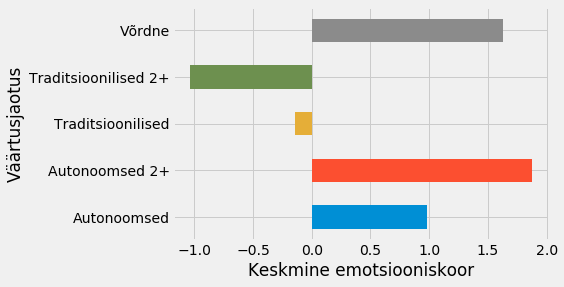

In [52]:
with plt.style.context('fivethirtyeight'):#keskmine emotsiooniskoor väärtusjaotuse järgi
    df.groupby('Väärtusjaotus')['Emotsiooniskoor'].mean().plot(kind='barh')
    plt.xlabel('Keskmine emotsiooniskoor')
    plt.ylabel('Väärtusjaotus')

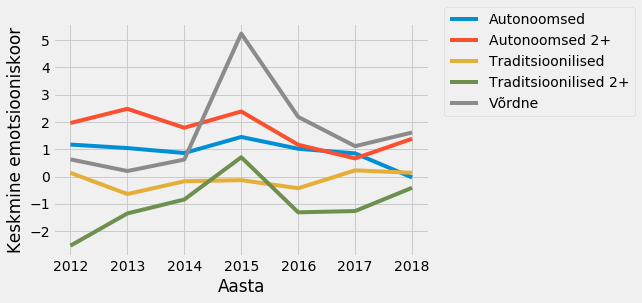

In [53]:
import matplotlib.pyplot as plt #väärtusjaotus aastate lõikes
with plt.style.context('fivethirtyeight'):
    df.groupby(['Aasta','Väärtusjaotus'])['Emotsiooniskoor'].mean().unstack().plot(kind='line')     
    plt.xlabel('Aasta')
    plt.ylabel('Keskmine emotsiooniskoor')
    #x =[0,1,2,3,4,5,6]
    #labels = ['2012','2013','2014','2015','2016','2017','2018']
    #plt.xticks(x, labels)
    #plt.title ('Keskmine emotsionaalsusskoor')
    plt.legend(loc=(1.04,0.6))

Lisaks andmete kvantitatiivsele analüüsile on sotsiaalteadlaste jaoks oluline ka tekste kvalitatiivselt analüüsida. Ainult emotsiooniskoori järgi (emotsionaalsust sisaldavate tekstiühikute väärtuste summa)  tekste otsides tulevad valikusse pikemad tekstid, ainult tekstide keskmise emotsiooniskoori järgi otsides (emotsiooniskoor jagatuna sõnade arvuga) tulevad jällegi lühemad tekstid, sest mida lühem tekst, sest suurem on emotsioonisõnastikus oleva sõna (või ka tujukuju või emotsioonisõnastikus mitteoleva tegusõna) mõju keskmisele. 

Tekstidest paremate otsingutulemuste saavutamiseks loodi kaalutud keskmine emotsiooniskoor, mis arvutatakse sõltuvalt sõnade arvust tekstis järgmistel põhimõtetel: 
* Kuni 10 sõna tekstis – emotsionaalsusskoor korrutatakse läbi arvuga 0,25; 
* Rohkem kui 10 sõna ja vähem kui esimeses kvartiilis korrutatakse läbi arvuga 0,5; 
* Sõnade arv vahemikus esimene kvartiil (I kv) ja III kvartiil (III kv) korrutatakse ühega; 
* Sõnade arv suurem kui III kvartiil ja väiksem kui maksimum (kolmanda ja esimese kvartiili vahe ehk IQR, mis on korrutatud 1,5-ga + kolmas kvartiil) korrutatakse läbi arvuga 1,5: 
* Maksimumist suurem sõnade arv korrutatakse läbi arvuga 2.

In [55]:
kaalutud_emotsiooniskoor =[]#kaalutud emotsiooniskoori arvutamine
esimene_kvartiil =df.Sõnade_arv.quantile(0.25)
kolmas_kvartiil=df.Sõnade_arv.quantile(0.75)
IQR = kolmas_kvartiil - esimene_kvartiil
maksimum =kolmas_kvartiil + 1.5*IQR
print(esimene_kvartiil, kolmas_kvartiil, IQR, maksimum)
for index, row in df.iterrows():
    if row['Sõnade_arv']<esimene_kvartiil and row['Sõnade_arv']>10:
        kaal_emo =row['Kaalutud_emotsiooniskoor']*0.5
    elif row['Sõnade_arv']>kolmas_kvartiil and row['Sõnade_arv']<maksimum:
        kaal_emo =row['Kaalutud_emotsiooniskoor']*1.5
    elif row['Sõnade_arv']>=maksimum:
        kaal_emo =row['Kaalutud_emotsiooniskoor']*2
    elif row['Sõnade_arv']<=10:
        kaal_emo =row['Kaalutud_emotsiooniskoor']*0.25
    else:
        kaal_emo =row['Kaalutud_emotsiooniskoor']
    kaalutud_emotsiooniskoor +=[kaal_emo*100]
df['Kaalutud_emotsiooniskoor2'] = kaalutud_emotsiooniskoor 

68.0 182.0 114.0 353.0


Näidispäring nr 1. Leitakse kolm kõige madalama emotsiooniskooriga teksti. Kui soovida leida kolm kõige suurema emotsiooniskooriga teksti, tuleb koodis kirjutada "nsmallest" asemele "nlargest".

In [849]:
df_filter=df.nsmallest(3,'Emotsiooniskoor')
for rida in puhas_jarjend2:
    for index,row in df_filter.iterrows():
        if rida[0]==row[0]:
            print('Sõnade arv',row['Sõnade_arv'])
            print('Kasvatusväärtusi kokku', row['Kasvatusväärtusi'])
            print('Kaalutud emotsionaalsusskoor',row['Kaalutud_emotsiooniskoor'])
            print('Emotsionaalsusskoor', row['Emotsiooniskoor'])
            print(rida[5])#leiame teisest failist teksti
            print()

Sõnade arv 586
Kasvatusväärtusi kokku 1
Kaalutud emotsionaalsusskoor -0.05204778156996587
Emotsionaalsusskoor -30.5
minu vanem poja (8a) asperger. see selgus ka kooli minnes. enne arvasin ikka, et tegu lihtsalt lapse jonnihoogudega. lasteaias oli probleeme tegevuse lõpetamisega. koolis käitumine siiani olnud hea, õppinud viitele. kui juhtumisi tulnud neli, siis peab seda halvaks hindeks. kord sai märkuse ja nuttis selle pärast tund aega esiku põrandal pikali maas. aga kodus elab end välja solvab, lööb, karjub, on väga ebaviisakas, on majast välja jooksnud, võib kasvõi keset ööd kisada. on kuri ka pisema venna vastu kui too teeb midagi keelatut, on teda ka löönud, samas kui hea tuju, siis mängivad väga ilusasti koos. vihasena trambib jalgu, peksab seinu, viimasel ajal on hakanud end lööma käega vastu pead. väga ebameeldiv situatsioon oli kord külas olles, kus ta kogemata mänguhoos tegi sõbra lapsele haiget ning lukustas end siis vannituppa ja hakkas seal röökima, et ta on nii paha laps 

Sõnade arv 616
Kasvatusväärtusi kokku 2
Kaalutud emotsionaalsusskoor -0.07386363636363637
Emotsionaalsusskoor -45.5
http://www. femme. ee/blog/mariann/Üks kiri27. Feb 2012  Kallis õpetaja,Ma ei tea, kas Te enam mäletategi mind.  Kasparit. Seda kriimulise näo ja kurbade silmadega väänikut, keda Te alalõpmata direktori juurde saatsite või päevikusse märkusi kritseldasite. Minuga polnud lihtne. Olin rahutu ja jonnakas, liiga vali ja segav. Te nii püüdsite hoida klassis korda ja kuulekalt enda kohustusi täita…ja mina olin ülbe ja egoistlik. Teie arvates. Tegelikult oli mul Teist siiralt ja südamest kahju, sest Teie ülipüüdlikkus muutis Teid kellekski teiseks ja eemaldas Teid tegelikult meist. Aine muutus igavaks, sest Teie muutusite tavaliseks moraalijüngriks, kelle sõnades puudus tegelik huvi ja soov midagi jagada. Õpilastena püüdsime me käituda võimalikult korralikult ja viksilt, et mahtuda meile pealesurutud raamidesse, kuid sisemuses kisendasime vabaduse järgi. “Ma tahan õhku. Ma ei sa

Näidispäring 2. Leitakse kolm kõige madalama kaalutud keskmise emotsiooniskooriga teksti.

In [850]:
df_filter=df.nsmallest(3,'Kaalutud_emotsiooniskoor2')
for rida in puhas_jarjend2:
    for index,row in df_filter.iterrows():
        if rida[0]==row[0]:
            print('Sõnade arv',row['Sõnade_arv'])
            print('Kasvatusväärtusi kokku', row['Kasvatusväärtusi'])
            print('Kaalutud emotsionaalsusskoor',row['Kaalutud_emotsiooniskoor'])
            print('Emotsionaalsusskoor', row['Emotsiooniskoor'])
            print(rida[5])
            print()

Sõnade arv 73
Kasvatusväärtusi kokku 1
Kaalutud emotsionaalsusskoor -0.2054794520547945
Emotsionaalsusskoor -15.0
Teemaalgataja on jobu. Sul muud pole teha kui 16-aastasega kakelda ja isa ja ennast \”austama\” panna? Loll eit oled, ei muud, ja see isa on seal kodus mingi pastel, keda sa oled läbi niku suutnud endale allutada. Häbi pole teise naise meest ära varastada, mõrd selline? Ma pidin naeru kätte ära surema lause \”meie mehega hommikuti kallistame, enne kui tööle läheme\”. KAS TÕESTI on nii lamedaid paarikesi olemas????? Napakas lits, osta elu omale. 

Sõnade arv 78
Kasvatusväärtusi kokku 1
Kaalutud emotsionaalsusskoor -0.16666666666666666
Emotsionaalsusskoor -13.0
Mul 13-aastane poeg ja kõige suuremaks probleemiks on tema hilinemine. Hommikuti kooli loivab pool tundi ja enamasti hilineb. Mõnikord ei jõua üldse esimesse tundi, siis jälle ei jõua kolmandase tundi või hilineb üle 10 minuti. Kuskile minek on, siis venib nagu tatt, istub viimase minutini diivanil ja kui kõik on juba 

Näidispäring 3. Leitakse kolm kõige kõrgema kaalutud keskmine emotsiooniskooriga teksti, kus sisalduksid nii konformsed kui loomingulised kasvatusväärtused. 

In [851]:
df_filter=df[(df.Trad_konformsus != 0) & (df.Autonoomia_looming !=0)].nlargest(3,'Kaalutud_emotsiooniskoor')
for rida in puhas_jarjend2:
    for index,row in df_filter.iterrows():
        if rida[0]==row[0]:
            print('Sõnade arv',row['Sõnade_arv'])
            print('Kasvatusväärtusi kokku', row['Kasvatusväärtusi'])
            print('Kaalutud emotsionaalsusskoor',row['Kaalutud_emotsiooniskoor'])
            print('Emotsionaalsusskoor', row['Emotsiooniskoor'])
            print(rida[5])
            print()

Sõnade arv 31
Kasvatusväärtusi kokku 2
Kaalutud emotsionaalsusskoor 0.12903225806451613
Emotsionaalsusskoor 4.0
Trenn või muu hobi aitab tõesti väga hästi. Meie laps hakkas iluvõimlemisega tegelema ja see on talle olnud ülimalt positiivne igas mõttes: andnud julgust ja enesekindlust, aga ka püsivust ja enesedistsipliini.

Sõnade arv 78
Kasvatusväärtusi kokku 3
Kaalutud emotsionaalsusskoor 0.16666666666666666
Emotsionaalsusskoor 13.0
Hea ja mitmekülgne haridus loob võimekust ja rohkem võimalusi eneseteostuseks. Tähtis on ju valikute võimalus. Eks need valikud pole kerged ja asjaolusid on erinevaid. Ärme üldista 🙂 Aga kui julgus ja enesekindlus tuginevad heale haridusele, siis pole tegemist lausülbusega, vaid pigem noortele iseloomuliku tormakuse ja illusiooniga enese küpsusest 🙂 Viisakus ja empaatiavõime on hea hariduse oluline osa ja lapsi peab toetama ja innustama ka kodune keskkond ja vanemate hoiakud. Olgem sõbralikumad ja ärgem täiskasvanutena harjuta lapsi teisi sildistama. 

Sõna

Näidispäring 4. Leitakse kolm kõige madalama kaalutud keskmise emotsiooniskooriga teksti, kus sisalduksid nii konformsed kui loomingulised kasvatusväärtused. 

In [852]:
df_filter=df[(df.Trad_konformsus != 0) & (df.Autonoomia_looming !=0)].nsmallest(3,'Kaalutud_emotsiooniskoor')#['Names']
for rida in puhas_jarjend2:
    for index,row in df_filter.iterrows():
        if rida[0]==row[0]:
            print('Sõnade arv',row['Sõnade_arv'])
            print('Kasvatusväärtusi kokku', row['Kasvatusväärtusi'])
            print('Kaalutud emotsionaalsusskoor',row['Kaalutud_emotsiooniskoor'])
            print('Emotsionaalsusskoor', row['Emotsiooniskoor'])
            print(rida[5])
            print()

Sõnade arv 27
Kasvatusväärtusi kokku 2
Kaalutud emotsionaalsusskoor -0.07407407407407407
Emotsionaalsusskoor -2.0
Kui laps ei allu tunni distsipliinile ja pidevalt teeb õpetajale asjakohatuid märkusi, segab vahele jne, siis see ei peegelda mitte õpilase mõtlemisvõimet ja iseseisvust, vaid ainult kasvatamatust.

Sõnade arv 134
Kasvatusväärtusi kokku 2
Kaalutud emotsionaalsusskoor -0.0708955223880597
Emotsionaalsusskoor -9.5
Minu kogemus ütleb, et õpetaja ei karju ilmaasjata. Ütled, et ta kõrgendab häält, kui keegi ei saa aru. Aga kuidas see mitte-arusaamine välja näeb? Võibolla laps (mitte tingimata teemaalgataja oma) pahatahtlikult \”ei saa aru\”? Lollitab ja tegeleb muude asjadega tunnis, ei püüagi aru saada jne. Oma koolajast mäletan selliseid lapsi küll. Ja praegu on lapsed palju hullemad, distsipliini pole ollagi, kodune kasvatus on olematu… Minu põhikooli matemaatikaõpetaja, kes oli ühtlasi ka klassijuhataja, karjus meie peale iga päev vähemalt 15 minutit. Ja tal oli selleks põhju